<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/randomforest/regression/01_boston_randomforest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**
---

El dataset `Boston` contiene precios de viviendas de la ciudad de Boston, asi como información socio-economica del barrio en el que se encunetran.

# **Objetivo**
---
Se pretende ajustar un modelo de regresión que permita predecir el precio medio de una vivienda `MEDV` en función de las variables disponibles.

# **Diccionario de datos**
---

Número de instancias: 506

- `CRIM`: tasa de criminalidad per cápita por ciudad
- `ZN`: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
- `INDUS`: proporción de acres comerciales no minoristas por ciudad
- `CHAS`: variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)
- `NOX`: concentración de óxidos nítricos (partes por 10 millones)
- `RM`: promedio de cuartos por vivienda
- `EDAD`: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- `DIS`: distancias ponderadas a cinco centros de empleo de Boston
- `RAD`: índice de accesibilidad a las carreteras radiales
- `IMPUESTO`: tasa de impuesto a la propiedad de valor total por $ 10,000

- `PTRATIO`: ratio alumno-profesor por municipio
- `B`: $1000(Bk - 0.63)^2$ donde Bk es la proporción de negros por ciudad
- `LSTAT`: % estado inferior de la población
- `MEDV`: valor medio de las viviendas ocupadas por sus propietarios en $ 1000


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, GridSearchCV, ParameterGrid
from  sklearn.inspection  import  permutation_importance

import  multiprocessing 


In [2]:
boston = load_boston(return_X_y=False)
data = np.column_stack((boston.data, boston.target))
data = pd.DataFrame(data, columns = np.append(boston.feature_names, "MEDV"))
data.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# **Description**
---

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# **Split**
---

In [4]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
data.shape

(506, 14)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

# **Ajuste del modelo**
---

In [7]:
model = RandomForestRegressor(
    n_estimators = 10, #Numero de arboles incluido en el modelo
    criterion    = 'squared_error',
    max_depth    = None, #profundidad máxima que pueden alcanzar los árboles.
    max_features = 'auto',
    oob_score    = True,
    n_jobs       = -1,
    random_state = 123  
)

In [8]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True,
                      random_state=123)

# **Predicción y evaluación del modelo**
---

In [9]:
# Error de test del modelo inicial
y_pred = model.predict(X_test)

rmse = mean_squared_error(
    y_test, y_pred, squared = False
)

In [10]:
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 3.1454616429656905


# **Validación empleando el Out-of-Bag error**
---


In [11]:
train_scores = []
oob_scores = []
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
  model = RandomForestRegressor(
      n_estimators=  n_estimators,
      criterion='squared_error',
      max_depth=None,
      max_features='auto',
      oob_score = True,
      n_jobs = -1,
      random_state =123
  )
  model.fit(X_train, y_train)
  train_scores.append(model.score(X_train, y_train))
  oob_scores.append(model.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Valor óptimo de n_estimators: 116


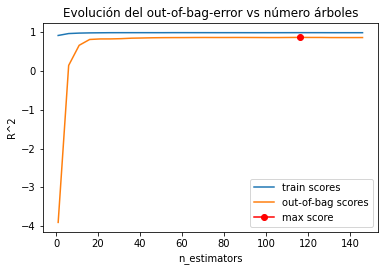

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

El modelo se estabiliza con 116 arboles

# **Validación empleando k-cross-validation y neg_root_mean_squared_error**
---

In [ ]:
train_scores = []
cv_scores    = []

estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
  model = RandomForestRegressor(
      n_estimators=  n_estimators,
      criterion='squared_error',
      max_depth=None,
      max_features='auto',
      oob_score = True,
      n_jobs = -1,
      random_state =123
  )

  model.fit(X_train, y_train)
  y_predict = model.predict(X_train)
  rmse = mean_squared_error(
      y_train, y_predict, squared = False
  )

  train_scores.append(rmse)

  scores = cross_val_score(
      estimator = model,
      X= X_train,
      y=y_train,
      scoring = 'neg_root_mean_squared_error',
      cv = 5
  )
  cv_scores.append(-1*scores.mean())

Valor óptimo de n_estimators: 146


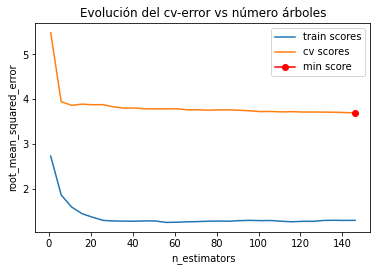

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

El modelo se estabiliza con 146 arboles

# **Max features oob_score**
---


In [15]:
train_scores = []
oob_scores = []

max_features_range = range(1, X_train.shape[1]+1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
  model = RandomForestRegressor(
    n_estimators = 100,
    criterion    = 'squared_error',
    max_depth    = None,
    max_features = max_features,
    oob_score    = True,
    n_jobs       = -1,
    random_state = 123
  )

  model.fit(X_train, y_train)
  train_scores.append(model.score(X_train, y_train))
  oob_scores.append(model.oob_score_)

Valor óptimo de max_features: 6


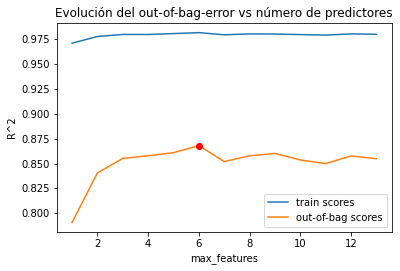

In [16]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

# **Max features cross val escore**


In [17]:
train_scores = []
cv_scores = []

max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
  modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
  )

  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  rmse = mean_squared_error(
      y_true = y_train,
      y_pred = y_pred,
      squared  = False
  )

  train_scores.append(rmse)

  scores = cross_val_score(
      estimator = model,
      X = X_train,
      y = y_train,
      scoring = 'neg_root_mean_squared_error',
      cv = 5
  )
  cv_scores.append(-1 * scores.mean())

Valor óptimo de max_features: 11


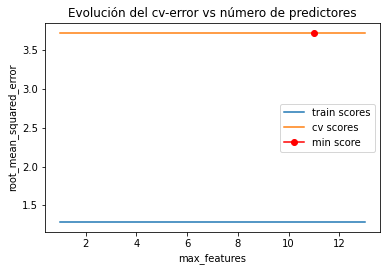

In [18]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

El valor ptimo está entre 6 y 11 maximo caracteristica

# **Grid search**
---




## **Grid Search basado en out-of-bag error**
---

In [21]:
# Grid de hiperparámetros evaluados
param_grid = ParameterGrid(
    {
        'n_estimators': [50, 100, 150],
        'max_features': [5, 7, 9],
        'max_depth'   : [None, 3, 10, 20]
    }
)

resultados = {'params': [], 'oob_r2': []}

for params in param_grid:
  model = RandomForestRegressor(
      oob_score = True,
      n_jobs=-1, 
      random_state = 123,
      **params
  )

  model.fit(X_train, y_train)

  resultados['params'].append(params)
  resultados['oob_r2'].append(model.oob_score_)
  print(f"Modelo: {params} \u2713")

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features':

In [22]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
19,0.868282,10.0,5.0,100.0
29,0.867890,20.0,5.0,150.0
20,0.867496,10.0,5.0,150.0
2,0.866231,NaN,5.0,150.0


In [26]:
# Grid de hiperparámetros evaluados paralelizada

param_grid = ParameterGrid(
    {
        'n_estimators': [50, 100, 150],
        'max_features': [5, 7, 9],
        'max_depth'   : [None, 3, 10, 20]
    }
)

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
def eval_oob_error(X, y, model, params, verbose=True):
  """
  Funcioón para entrenar un modelo utilizando unos parametros determinados 
  y que retorna el aut-of-bag-error
  """

  model.set_params(
      oob_score = True,
      n_jobs = -1,
      random_state = 123,
      **params
  )

  model.fit(X, y)

  if verbose:
    print(f'Modelo: {params} \u2713')

  return {'params': params, 'oob_r2': model.oob_score_}

n_jobs = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(eval_oob_error, [(X_train, y_train, RandomForestRegressor(), params) for params in param_grid]
             )

Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 50} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓
Modelo: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 50} ✓
Modelo: {'max_depth': 3, 'max_features': 7, 'n_estimators': 100} ✓
Modelo: {'max_depth': 3, 'max_features':

In [27]:
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_r2', ascending=False)
resultados.head(4)

,oob_r2,max_depth,max_features,n_estimators
19,0.868282,10.0,5.0,100.0
29,0.867890,20.0,5.0,150.0
20,0.867496,10.0,5.0,150.0
2,0.866231,NaN,5.0,150.0


## **Grid Search basado en validación cruzada**
---

In [33]:
param_grid = {
        'n_estimators': [50, 100, 150],
        'max_features': [5, 7, 9],
        'max_depth'   : [None, 3, 10, 20]
        }


model = RandomForestRegressor(random_state=123)

grid = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = multiprocessing.cpu_count() - 1,
    cv = RepeatedKFold(n_splits = 5, n_repeats=3, random_state=123),
    refit = True,
    verbose = 0,
    return_train_score = True
)

grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=123),
             estimator=RandomForestRegressor(random_state=123), n_jobs=1,
             param_grid={'max_depth': [None, 3, 10, 20],
                         'max_features': [5, 7, 9],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [34]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
0,None,5,50,-3.507834,1.155395,-1.408905,0.095332
27,20,5,50,-3.508719,1.154410,-1.407862,0.093506
18,10,5,50,-3.518127,1.203861,-1.457730,0.101723
20,10,5,150,-3.549463,1.166689,-1.402324,0.079024


In [35]:
print('Mejor: %f usando %s' % (grid.best_score_, grid.best_params_))

Mejor: -3.507834 usando {'max_depth': None, 'max_features': 5, 'n_estimators': 50}


# **Mejor Modelo**
---

In [38]:
final_model = grid.best_estimator_
y_pred = final_model.predict(X_test)
rmse = mean_squared_error(
    y_test, y_pred, squared = False
)

print(f'El error (rmse) de test es: {rmse}')

El error (rmse) de test es: 3.044302240510778


El modelo final optimizado realiza predicciones se alejan en promedio 3.044 unidades del valor real
